In [132]:
#reading csv file
import pandas as pd
na1 = ["NA","N/A","Not Available"]
df = pd.read_csv(r"C:\NEEL DESAI\CMPICA\BSC-IT\Semester_6\DMA\Assignments\Assignment_01\Automobile_data.csv",na_values=na1)


In [133]:
df.isnull().sum()
#as there are NaN values present we have to replace them with techniques

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

In [8]:
#checking datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             61 non-null     int64  
 1   company           61 non-null     object 
 2   body-style        61 non-null     object 
 3   wheel-base        61 non-null     float64
 4   length            61 non-null     float64
 5   engine-type       60 non-null     object 
 6   num-of-cylinders  60 non-null     object 
 7   horsepower        60 non-null     float64
 8   average-mileage   61 non-null     int64  
 9   price             58 non-null     float64
dtypes: float64(4), int64(2), object(4)
memory usage: 4.9+ KB


In [134]:
df['price'].fillna(df['price'].mean(),inplace=True) #applying mean as datatype is numeric we can also apply median or mode

In [72]:
df['horsepower'].fillna(df['horsepower'].median(),inplace=True) 

In [73]:
df['engine-type']=df['engine-type'].fillna(df['engine-type']).mode()[0] #applying mode as datatype is object type

In [74]:
df['num-of-cylinders']=df['num-of-cylinders'].fillna(df['num-of-cylinders']).mode()[0]

In [124]:
df.isnull().sum()

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               0
dtype: int64

In [23]:
#Que 1: Binning using Python (Normalization technique)
#1.1 Implement Binning using cut and qcut methods.
#For cut method: We need to find out min & max of particular column
print("Min value:",df['price'].min())
print("Max value:",df['price'].max())

Min value: 5151.0
Max value: 45400.0


In [25]:
#creating bins and giving lables
bins = [5151,15000,30000,45000]
labels = ['small','medium','Large']

In [34]:
df['price_new_cut'] = pd.cut(df['price'], bins =bins, labels = labels, include_lowest=True)
print(df['price_new_cut'].head(60),df['price'].head(60))

0      small
1     medium
2     medium
3      small
4     medium
5     medium
6     medium
7     medium
8     medium
9     medium
10     Large
11     Large
12     Large
13     small
14     small
15     small
16     small
17     small
18     small
19     small
20     small
21     small
22    medium
23    medium
24     Large
25     Large
26     Large
27     small
28     small
29     small
30     small
31    medium
32    medium
33    medium
34     Large
35       NaN
36     small
37     small
38     small
39     small
40     small
41     small
42     small
43     small
44     small
45     Large
46     Large
47    medium
48     small
49     small
50     small
51     small
52     small
53     small
54    medium
55     small
56     small
57     small
58     small
59     small
Name: price_new_cut, dtype: category
Categories (3, object): ['small' < 'medium' < 'Large'] 0     13495.0
1     16500.0
2     16500.0
3     13950.0
4     17450.0
5     15250.0
6     18920.0
7     16430.0
8     16925.0
9 

In [36]:
#also counting the values how many are small, medium or large
df['price_new_cut'].value_counts()

small     36
medium    15
Large      9
Name: price_new_cut, dtype: int64

In [50]:
#applying qcut
labels = ['small','medium','Large','Extra large'] #total name of lables are equal to value of q
df['price_new_qcut'] = pd.qcut(df['price'], q=4,labels=labels)
df['price_new_qcut'].head(60),df['price'].head(60)

(0           Large
 1           Large
 2           Large
 3           Large
 4           Large
 5           Large
 6     Extra large
 7           Large
 8           Large
 9     Extra large
 10    Extra large
 11    Extra large
 12    Extra large
 13          small
 14          small
 15          small
 16          small
 17          small
 18         medium
 19          Large
 20         medium
 21          small
 22          Large
 23          Large
 24    Extra large
 25    Extra large
 26    Extra large
 27          small
 28          small
 29          small
 30         medium
 31    Extra large
 32    Extra large
 33    Extra large
 34    Extra large
 35    Extra large
 36          small
 37          small
 38         medium
 39         medium
 40         medium
 41          small
 42          small
 43         medium
 44          Large
 45    Extra large
 46    Extra large
 47          Large
 48          small
 49          small
 50          small
 51         medium
 52         

In [52]:
#1.2 Also, transform the bins values
df.groupby('price_new_cut')['price'].transform('mean') #bymean alson can apply median and mode

0      8206.555556
1     18200.000000
2     18200.000000
3      8206.555556
4     18200.000000
          ...     
56     8206.555556
57     8206.555556
58     8206.555556
59     8206.555556
60     8206.555556
Name: price, Length: 61, dtype: float64

In [54]:
df.groupby('price_new_qcut')['price'].transform('median') #by median value of qcut

0     15387.0
1     15387.0
2     15387.0
3     15387.0
4     15387.0
       ...   
56     7975.0
57     7975.0
58     7975.0
59     7975.0
60    15387.0
Name: price, Length: 61, dtype: float64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

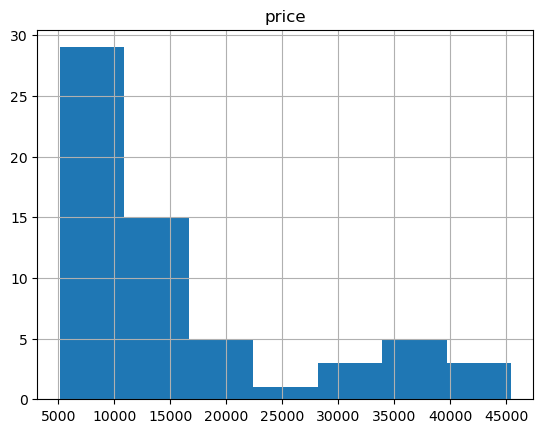

In [66]:
#2. Outlier detection and removal
#Using visualization method

#Histogram
df.hist(column='price', bins=7)  #histogram is available in basic pandas package
#we need to pass only one feature name and total bins we required and histogram will be created

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'wheel-base'}>],
       [<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'average-mileage'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

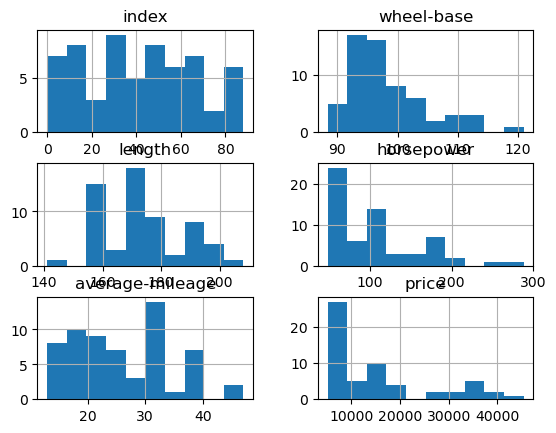

In [85]:
df.hist() #here only 5 charts are created as the datatype of 

<AxesSubplot:xlabel='price'>

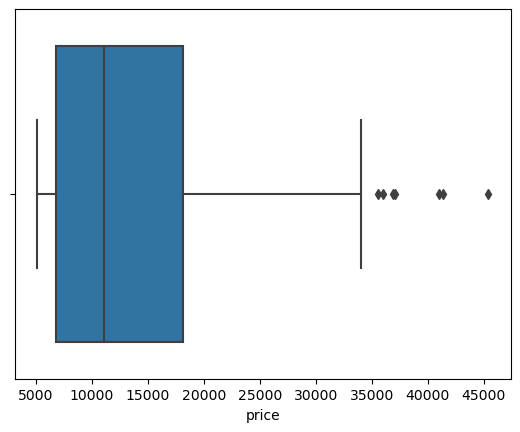

In [86]:
#importing seaborn package for plotting boxplot
import seaborn as sns 
sns.boxplot(x=df['price']) 

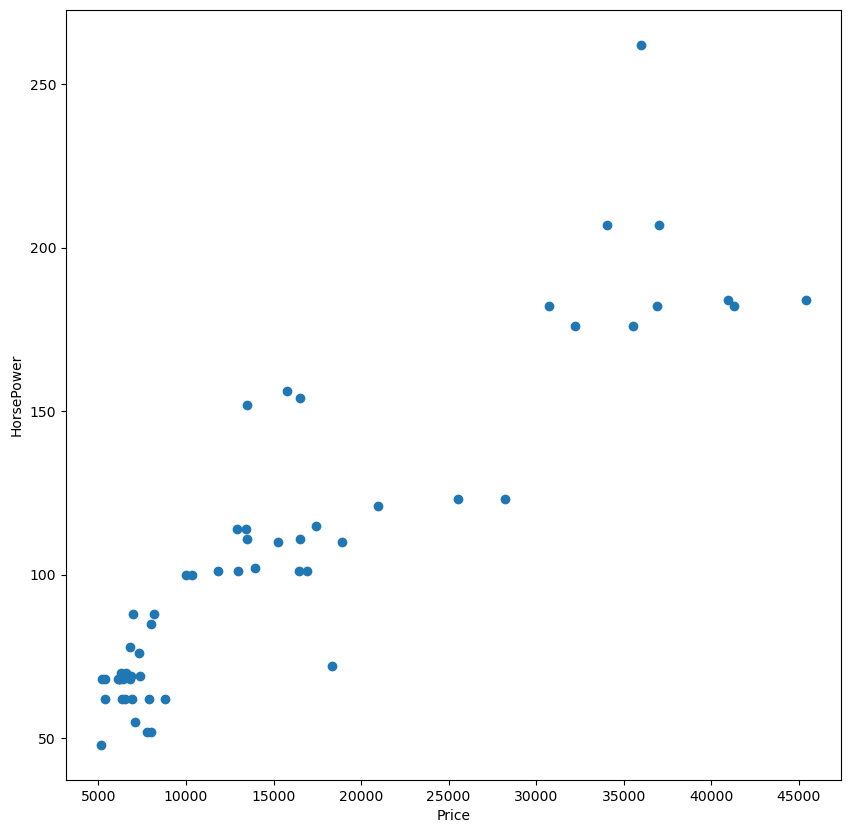

In [95]:
# Scatter plot
#importing matplotlib.pyplot package for plotting boxplot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df['price'], df['horsepower'])
 
# x-axis label
ax.set_xlabel('Price')
 
# y-axis label
ax.set_ylabel('HorsePower')
plt.show()

In [111]:
#Statistical method

# Z score
from scipy import stats
import numpy as np

df['hp_z_scores'] = stats.zscore(df['horsepower'], nan_policy='omit')

In [114]:
#printing the position of outlier
print(np.where(df['hp_z_scores'] > 2))

(array([26, 47], dtype=int64),)


In [136]:
#InterQuantileRange (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR) #PRINTING IQR VALUES

index                 43.0
wheel-base             6.7
length                18.2
horsepower            55.0
average-mileage       12.0
price              10601.0
dtype: float64


In [137]:
#FINDING upper and lower values for entire dataset
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(upper)
print(lower)

index                125.50
wheel-base           111.25
length               204.60
horsepower           205.50
average-mileage       49.00
price              33351.50
dtype: float64
index               -46.50
wheel-base           84.45
length              131.80
horsepower          -14.50
average-mileage       1.00
price             -9052.50
dtype: float64


In [138]:
#Finding range for specific column
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(upper) #if value greater than the range outlier
print(lower) #if value less than the range outlier

205.5
-14.5


In [142]:
#printing outlier
outliers = df['horsepower'][((df['horsepower']<(Q1-1.5*IQR)) | (df['horsepower']>(Q3+1.5*IQR)))]
print(outliers)

47    288
Name: horsepower, dtype: int64


In [141]:
#2.3 Treating outliers
#Method 1: By replacing values with any other value which don't violate
df['horsepower'].replace([262,207],[100,125],inplace=True)
outliers = df['horsepower'][((df['horsepower']<(Q1-1.5*IQR)) | (df['horsepower']>(Q3+1.5*IQR)))]
print(outliers)

47    288
Name: horsepower, dtype: int64


In [143]:
#Method 2: drop the row that contains the outlier by passing index
df.drop(index=47, inplace = True)
print("New Shape: ", df.shape)

New Shape:  (60, 10)


In [144]:
#printing outlier
outliers = df['horsepower'][((df['horsepower']<(Q1-1.5*IQR)) | (df['horsepower']>(Q3+1.5*IQR)))]
print(outliers)

Series([], Name: horsepower, dtype: int64)
